In [13]:
from os import path
import pickle
import json


from lmfit import Model


from experiments.looped_experiment import looped_experiment

In [14]:
config_file = path.abspath(path.join(path.curdir, "Security", "AES_Flash", "looped_experiment.json"))

In [15]:
with open(path.join(config_file)) as json_file:
    config = json.load(json_file)
config

{'name': 'AES Flash',
 'project_paths': [['.', 'AES_Flash-S']],
 'config_dict': {'interfaces': [256, 48],
  'loggers': [1, 0],
  'gpio_delay_time': 0.0007,
  'file_name_base': 'experiment_aes_flash'},
 'config_dict_plot': {'loggers': [1, 2, 0],
  'plot_pins_method': 'line',
  'plot_xmax': 5,
  'window_title': 'Experiment AES Flash'},
 'analysis': {'pins': {'2': ['AES Encrypt', 'AES Decrypt'],
   '3': ['Flash Write', 'Flash Read']},
  'result_types': ['Charge', 'Time'],
  'labels': {'Charge': {'x': 'Data Size',
    'x_unit': 'bytes',
    'y': 'Charge',
    'y_unit': 'C'},
   'Time': {'x': 'Data Size', 'x_unit': 'bytes', 'y': 'Time', 'y_unit': 's'}},
  'x_step': 16},
 'stop_functions': {'log': 'def log_stop_function(logger_data): return all(logger_data.gpio.values[-1])',
  'analysis': 'def analysis_stop_function(pin_values): return all(pin_values)'}}

In [16]:
    from pydgilib_extra import DGILibExtra, power_and_time_per_pulse
    from atprogram.atprogram import atprogram
    
    
    verbose=1
    config_dict={}
    live_plot=False
    max_log_time=10
    log_stop_function=None
    analysis_stop_function=None
    dump_pickle=True,
    fit_lm=True
    model=None
    show_lm_plot=2

    # The config_file should be a json file with parameters
    with open(path.join(config_file)) as json_file:
        config = json.load(json_file)

    # Parse project paths. If they start with a dot, assume they are relative
    # to the json file
    project_paths = config.get("project_paths")
    for i, project_path in enumerate(project_paths):
        if project_path[0] == '.':
            project_paths[i] = path.abspath(
                path.join(path.dirname(config_file), *project_path))
        else:
            project_paths[i] = path.abspath(path.join(*project_path))

    # Compile project and program it on the board
    atprogram(project_paths[0], clean=False, build=False,
              erase=True, program=False, verify=False, verbose=verbose)
    for project_path in project_paths:
        atprogram(project_path, clean=False, build=True, erase=False,
                  program=True, verify=False, verbose=verbose)

    # Load config_dict from config_file
    _config_dict = config.get("config_dict")
    if live_plot:
        _config_dict.update(config.get("config_dict_plot"))
    # Update config_dict from function argument
    _config_dict.update(config_dict)
    config_dict = _config_dict

    # Get stop function for logger
    if log_stop_function is None:
        exec(config.get("stop_functions").get("log"))

    if verbose:
        print(f"Start DGILibExtra with config: \n{config_dict}\n")

    logger_data = []
    with DGILibExtra(**config_dict) as dgilib:
        dgilib.device_reset()
        dgilib.logger.log(max_log_time, log_stop_function)
        logger_data = dgilib.data

    if verbose:
        print(f"DGILibExtra logger_data: {logger_data}")

    # Get stop function for logger
    if analysis_stop_function is None:
        exec(config.get("stop_functions").get("analysis"))

    analysis_config = config.get("analysis")
    result_types = analysis_config.get("result_types")
    x_step = analysis_config.get("x_step")
    parsed_data = {}
    for pin, parameter_names in analysis_config.get("pins").items():
        data = power_and_time_per_pulse(
            logger_data, int(pin), stop_function=analysis_stop_function)
        num_names = len(parameter_names)
        for i, parameter_name in enumerate(parameter_names):
            parsed_data[parameter_name] = {
                result_types[0]: data[0][i::num_names],
                result_types[1]: data[1][i::num_names],
                "x_step": x_step}
    if dump_pickle:
        pickle.dump(parsed_data, open(
            path.join(path.dirname(config_file),
                      f"{config_dict.get('file_name_base')}.p"), "wb"))

Firmware check OK
Chiperase completed successfully

make: Nothing to be done for 'all'.

Firmware check OK
Programming completed successfully.

Start DGILibExtra with config: 
{'interfaces': [256, 48], 'loggers': [1, 0], 'gpio_delay_time': 0.0007, 'file_name_base': 'experiment_aes_flash'}

DGILibExtra logger_data: Interfaces:
	 256:   power,   samples:   53000
	  48:   gpio,    samples:     805



In [8]:
parsed_data

{'AES Encrypt': {'Charge': [5.4301922616777e-07,
   1.0462657503621651e-06,
   1.5657460242312412e-06,
   2.057628912704762e-06,
   2.5998364445699356e-06,
   3.1185050260572168e-06,
   3.6193164711854447e-06,
   4.14163338287822e-06,
   4.667658171744461e-06,
   5.174426921596832e-06,
   5.700392195311754e-06,
   6.24152236713263e-06,
   6.725323561723166e-06,
   7.271041680087014e-06,
   7.792952813501473e-06,
   8.286455114078695e-06,
   8.806186812467895e-06,
   9.32548262523479e-06,
   9.83239327366391e-06,
   1.036707175530735e-05,
   1.0886446492852357e-05,
   1.140045069202345e-05,
   1.1926516258785546e-05,
   1.2440439246161292e-05,
   1.2951841413348947e-05,
   1.3469961168941658e-05,
   1.4010865758477608e-05,
   1.452005064277991e-05,
   1.5045908603633081e-05,
   1.5551774688247278e-05,
   1.608549987877886e-05,
   1.6607000779158024e-05,
   1.7073075990872693e-05,
   1.7582719416740768e-05,
   1.8137166761807098e-05,
   1.86184820501473e-05,
   1.9178116251858612e-05,
  

In [12]:
len(parsed_data["AES Encrypt"]["Charge"])

50

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 50
    # variables        = 2
    chi-square         = 1.1958e-14
    reduced chi-square = 2.4912e-16
    Akaike info crit   = -1794.47096
    Bayesian info crit = -1790.64691
[[Variables]]
    slope:      3.2397e-08 +/- 9.6673e-12 (0.03%) (init = 0)
    intercept:  4.8697e-07 +/- 4.4064e-09 (0.90%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.862

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 50
    # variables        = 2
    chi-square         = 3.2519e-08
    reduced chi-square = 6.7747e-10
    Akaike info crit   = -1053.67356
    Bayesian info crit = -1049.84951
[[Variables]]
    slope:      6.1380e-05 +/- 1.5942e-08 (0.03%) (init = 0)
    intercept:  9.4633e-04 +/- 7.2666e-06 (0.77%) (init = 1)
[[Correlati

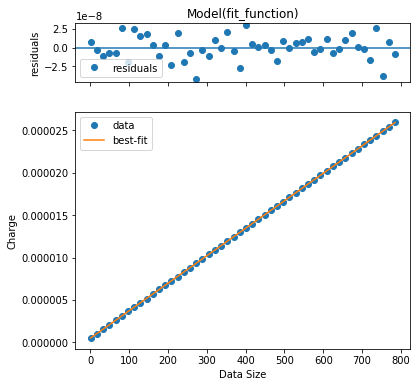

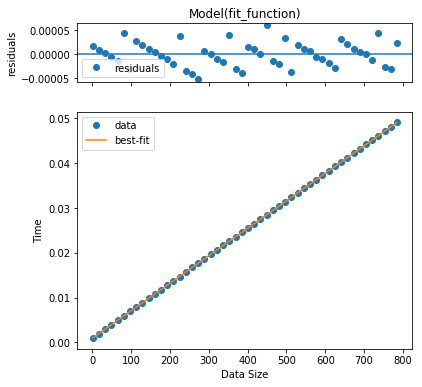

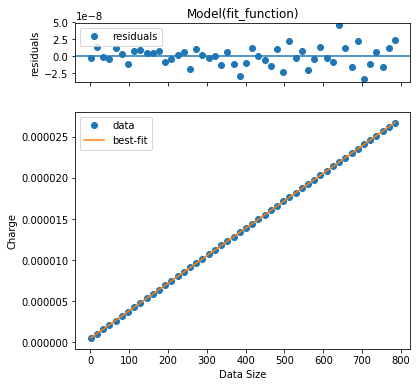

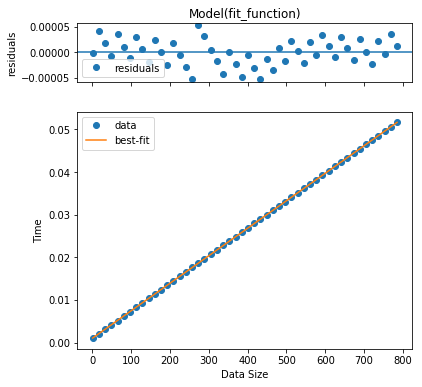

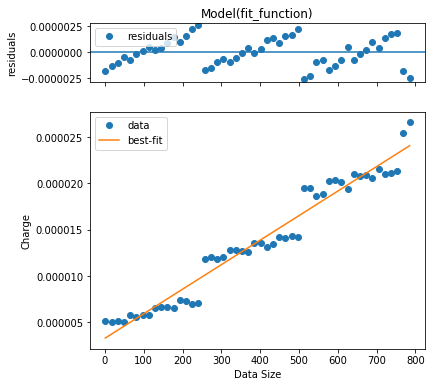

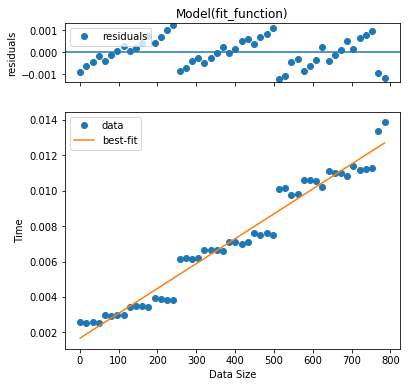

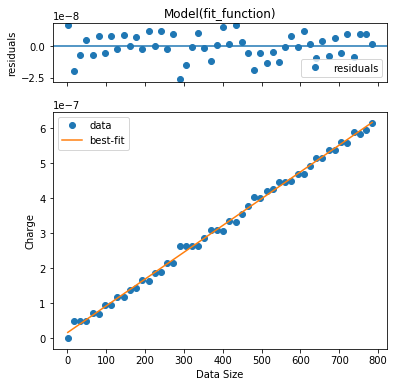

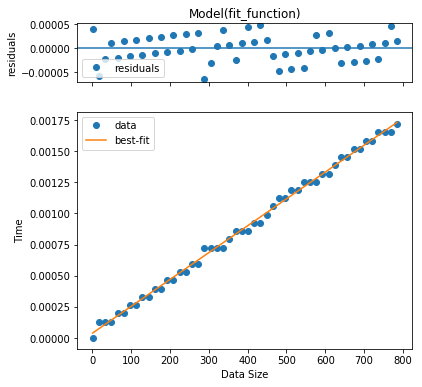

In [17]:
    if fit_lm:
        if model is None:
            def fit_function(x, slope, intercept):
                """a line"""
                return [slope*i + intercept for i in x]

            model = Model(fit_function)
            params = model.make_params(slope=0, intercept=1)
        else:
            params = model.params

        model_results = {}
        labels = analysis_config.get("labels")
        for parameter_name in parsed_data.keys():
            length = len(parsed_data[parameter_name][result_types[0]])
            x_step = parsed_data[parameter_name]["x_step"]
            num_bytes = range(1, length*x_step, x_step)
            model_result = {}
            for result_type in result_types:
                model_result[result_type] = model.fit(
                    parsed_data[parameter_name][result_type], params,
                    x=num_bytes)
                if verbose:
                    print(model_result[result_type].fit_report())
                if show_lm_plot >= 2:
                    model_result[result_type].plot(
                        xlabel=labels[result_type]["x"],
                        ylabel=labels[result_type]["y"])
                model_results[parameter_name] = model_result

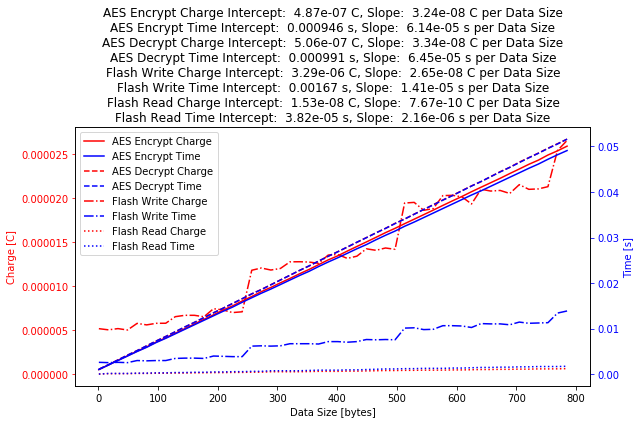

In [31]:
        if show_lm_plot:
            import matplotlib.pyplot as plt
            fig = plt.figure(figsize=(9, 6))
            fig.canvas.set_window_title(f"Analysis {config.get('name')}")
            colors = dict(zip(result_types, ['r', 'b']))
            line_styles = (
                line_style for line_style in ('-', '--', '-.', ':') * 2)
            # fig.suptitle(f"Energy analysis of {config.get('name')}")
            ax = {}
            ax[result_types[0]] = fig.add_subplot(1, 1, 1)
            ax[result_types[1]] = ax[result_types[0]].twinx()
            ax[result_types[0]].set_xlabel(
                f"{labels[result_types[0]]['x']} " +
                f"[{labels[result_types[0]]['x_unit']}]")
            for result_type in result_types:
                ax[result_type].set_ylabel(
                    f"{labels[result_type]['y']} " +
                    f"[{labels[result_type]['y_unit']}]",
                    color=colors[result_type])
                ax[result_type].tick_params('y', colors=colors[result_type])

            lines = []
            title_str = ""
            for parameter_name in parsed_data.keys():
                length = len(parsed_data[parameter_name][result_types[0]])
                x_step = parsed_data[parameter_name]["x_step"]
                num_bytes = range(1, length*x_step, x_step)
                model_result = {}
                line_style = next(line_styles)
                for result_type in result_types:
                    label = f"{parameter_name} {labels[result_type]['y']}"
                    lines += ax[result_type].plot(
                        num_bytes, parsed_data[parameter_name][result_type],
                        colors[result_type] + line_style,
                        label=label)
                    title_str += f"{label} "
                    for param in reversed(params.keys()):
                        title_str += "".join(
                            f"{params[param].name.capitalize()}: ")
                        title_str += "".join(
                            f"{model_results[parameter_name][result_type].params[param].value: .03} ")
                        title_str += "".join(
                            f"{labels[result_type]['y_unit']}, ")
                    title_str = title_str[:-2] + \
                        f" per {labels[result_type]['x']}\n"
            ax[result_types[0]].legend(handles=lines)
            ax[result_types[0]].set_title(title_str[:-1])
            fig.tight_layout()
            fig.show()

In [28]:
title_str = ""
title_str += "AES"
for param in reversed(params.keys()):
    title_str += "".join(f"{params[param].name.capitalize()}: ")
    title_str += "".join(f"{model_results[parameter_name][result_type].params[param].value: .03} ")
    title_str += "".join(f"{labels[result_type]['y_unit']}, ")
title_str = title_str[:-2f" per {labels[result_type]['x']}"

In [27]:
title_str

'AESIntercept:  3.82e-05 s, Slope:  2.16e-06 s per Data Size'

In [29]:
s = ""
s += f"{str(model_results['AES Encrypt']['Charge'].params[param]) for param in params.keys()}"
print(s)

<generator object <genexpr> at 0x051C38D0>


In [40]:
te = ""
for param in params.keys():
    te += f"{params[param].name.capitalize()}: {model_results['AES Encrypt']['Charge'].params[param].value:.03}, "
te[:-2]

'Slope: 3.23e-08, Intercept: 4.99e-07'

In [42]:
ee = ""

In [47]:
"".join(f"{params[param].name.capitalize()}: {model_results['AES Encrypt']['Charge'].params[param].value:.03}, " for param in params.keys())[:-2]

'Slope: 3.23e-08, Intercept: 4.99e-07'

In [3]:
looped_experiment(path.abspath(path.join(path.curdir, "Security", "AES", "looped_experiment.json")), show_lm_plot=2)

Firmware check OK
Chiperase completed successfully

make: Nothing to be done for 'all'.

Firmware check OK
Programming completed successfully.

Start DGILibExtra with config: 
{'interfaces': [256, 48], 'loggers': [1, 0], 'gpio_delay_time': 0.0007, 'file_name_base': 'experiment_aes'}

DGILibExtra logger_data: Interfaces:
	 256:   power,   samples: 15152000
	  48:   gpio,    samples:     405

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 50
    # variables        = 2
    chi-square         = 8.2697e-15
    reduced chi-square = 1.7229e-16
    Akaike info crit   = -1812.90996
    Bayesian info crit = -1809.08592
[[Variables]]
    slope:      3.2075e-08 +/- 8.0395e-12 (0.03%) (init = 0)
    intercept:  4.8858e-07 +/- 3.6645e-09 (0.75%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.862

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting 

AttributeError: Can't pickle local object 'looped_experiment.<locals>.fit_function'

In [1]:
styles = (style for style in ('-', '--', '-.', ':') * 2)

In [10]:
next(styles)

StopIteration: 

In [21]:
styles = (style for style in ('-', '--', '-.', ':'))
def get_style():
    try:
        return next(styles)
    except:
        styles = (style for style in ('-', '--', '-.', ':'))
        return get_style()

In [ ]:
get_style()

In [19]:
('-', '--', '-.', ':') * 2

('-', '--', '-.', ':', '-', '--', '-.', ':')

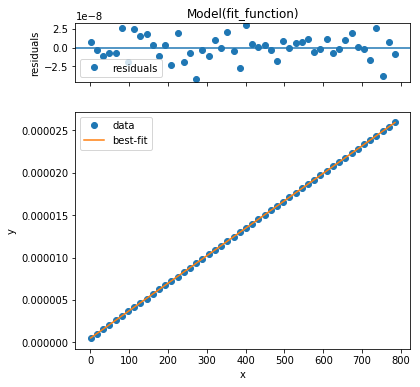

In [38]:
fig, grid = model_results['AES Encrypt']['Charge'].plot()

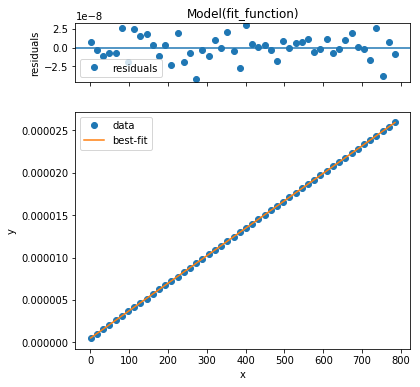

In [40]:
fig

In [37]:
b = model_results['AES Encrypt']['Charge'].plot

In [ ]:
b()